# Visualization with Seaborn

Matplotlib has been at the core of scientific visualization in Python for decades, but even avid users will admit it often leaves much to be desired.
There are several complaints about Matplotlib that often come up:

- A common early complaint, which is now outdated: prior to version 2.0, Matplotlib's color and style defaults were at times poor and looked dated.
- Matplotlib's API is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas `DataFrame` objects. In order to visualize data from a `DataFrame`, you must extract each `Series` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the `DataFrame` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas.

To be fair, the Matplotlib team has adapted to the changing landscape: it added the `plt.style` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and Matplotlib is starting to handle Pandas data more seamlessly.
But for all the reasons just discussed, Seaborn remains a useful add-on.

By convention, Seaborn is often imported as `sns`:

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np
import pandas as pd

In [32]:
# Create some data
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), axis=0)

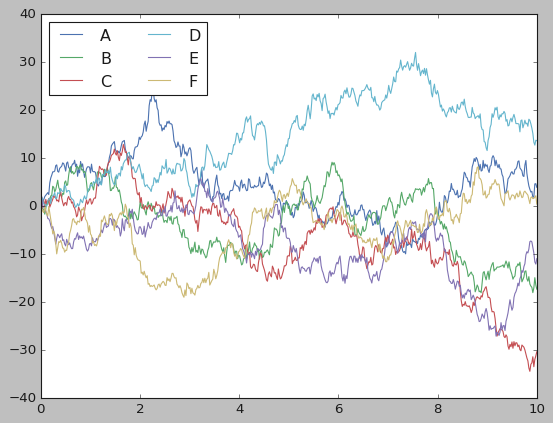

In [33]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [34]:
import seaborn as sns
sns.set()

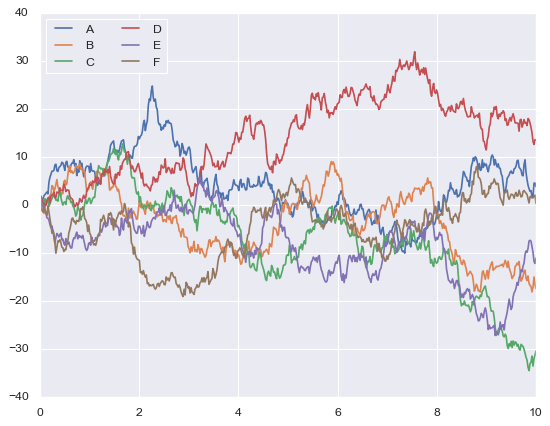

In [35]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()  # seaborn's method to set its chart style

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood), but the Seaborn API is much more convenient.

### Histograms, KDE, and Densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib (see the following figure):

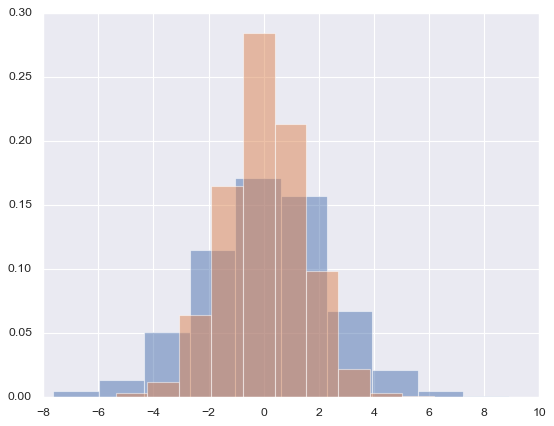

In [55]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)


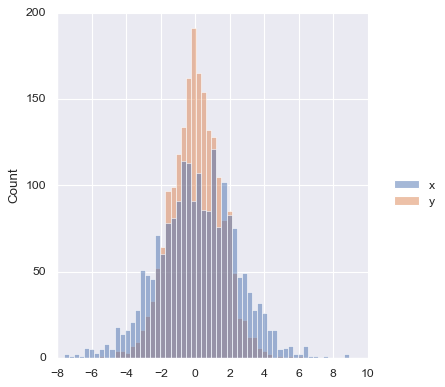

In [75]:
sns.displot(data=data);

Rather than just providing a histogram as a visual output, we can get a smooth estimate of the distribution using kernel density estimation (introduced in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb)), which Seaborn does with ``sns.kdeplot`` (see the following figure):

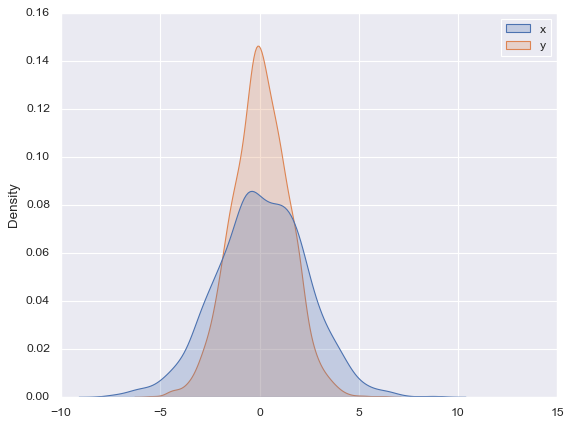

In [39]:
sns.kdeplot(data=data, fill=True);

If we pass `x` and `y` columns to `kdeplot`, we instead get a two-dimensional visualization of the joint density (see the following figure):

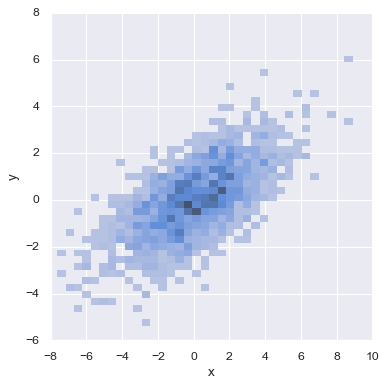

In [73]:
sns.displot(data=data, x='x', y='y');

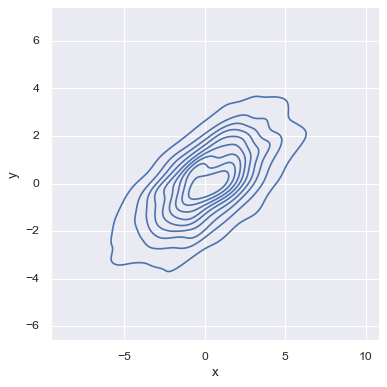

In [71]:
sns.displot(data=data, x='x', y='y', kind='kde');

We can see the joint distribution and the marginal distributions together using `sns.jointplot`, which we'll explore further later in this chapter.

### Pair Plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. These are very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three Iris species:

In [41]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot`` (see the following figure):

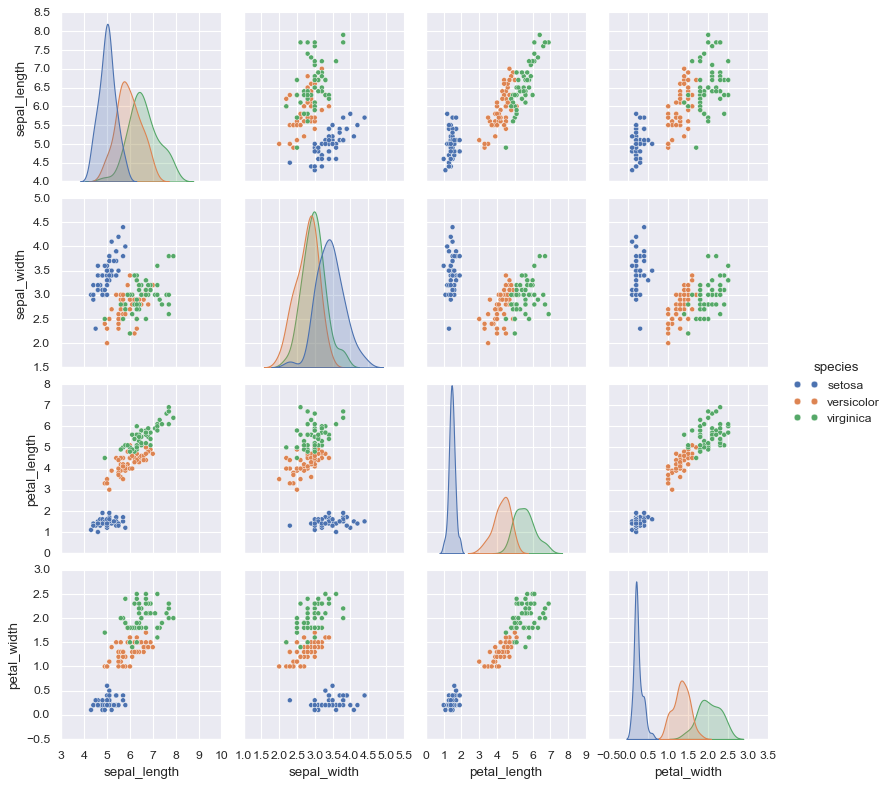

In [42]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted Histograms

Sometimes the best way to view data is via histograms of subsets, as shown in the following figure. Seaborn's `FacetGrid` makes this simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:[^1]

[^1]: The restaurant staff data used in this section divides employees into two sexes: female and male. Biological sex
isn’t binary, but the following discussion and visualizations are limited by this data.

In [43]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


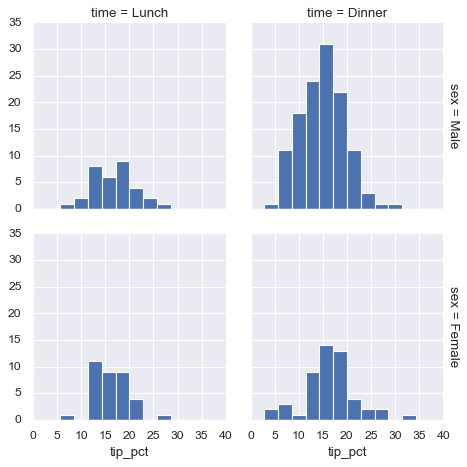

In [44]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

The faceted chart gives us some quick insights into the dataset: for example, we see that it contains far more data on male servers during the dinner hour than other categories, and typical tip amounts appear to range from approximately 10% to 20%, with some outliers on either end.

### Categorical Plots

Categorical plots can be useful for this kind of visualization as well. These allow you to view the distribution of a parameter within bins defined by any other parameter, as shown in the following figure:

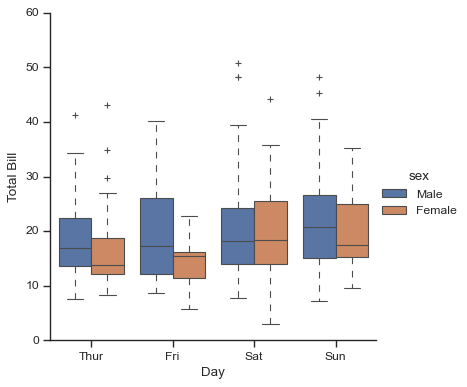

In [45]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint Distributions

Similar to the pair plot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions (see the following figure):

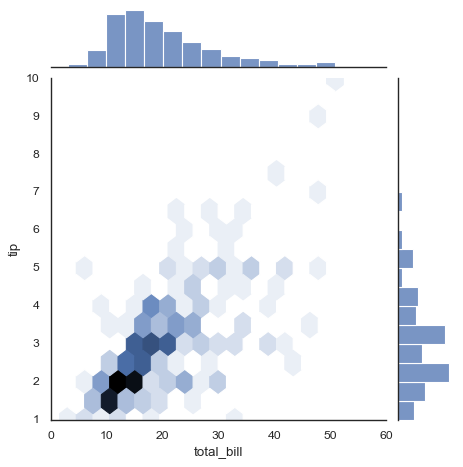

In [46]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression, as shown in the following figure:

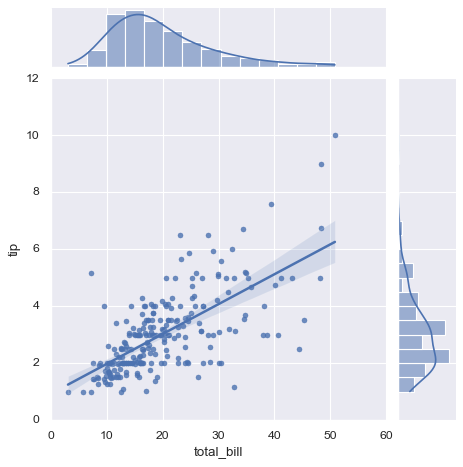

In [47]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### Bar Plots

Time series can be plotted using `sns.factorplot`. In the following example, we'll use the Planets dataset that we first saw in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb); see the following figure for the result:

In [48]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


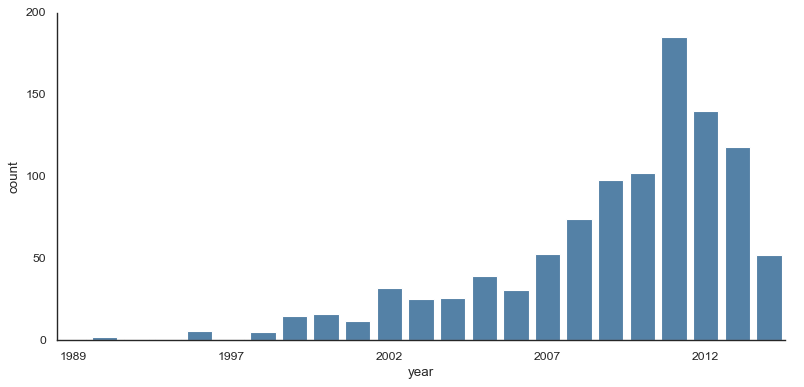

In [52]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                    kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets (see the following figure):

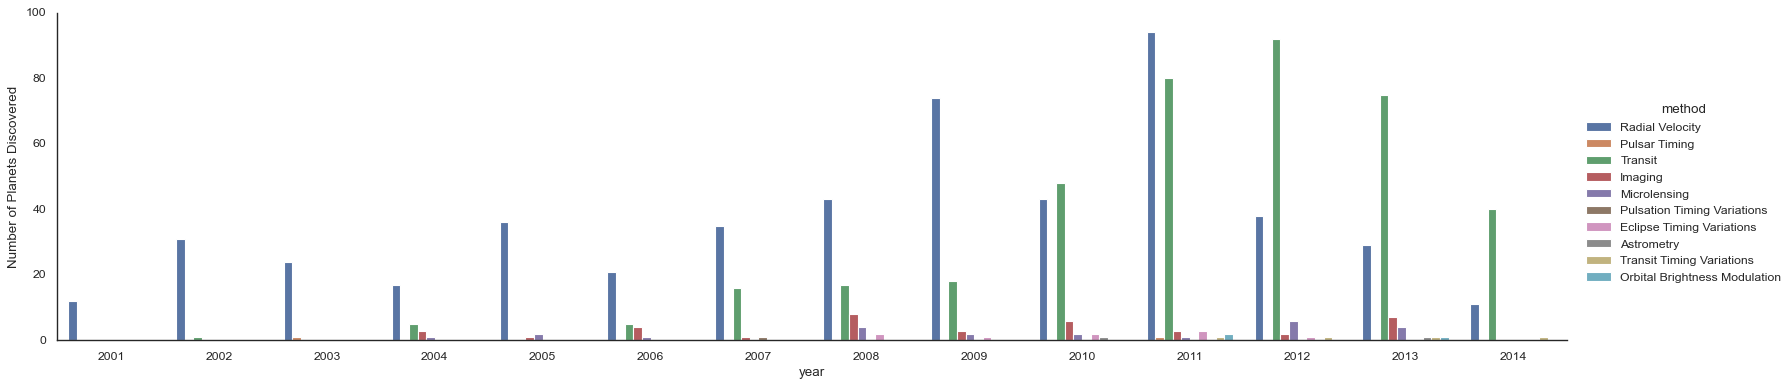

In [53]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), and particularly the [example gallery](https://seaborn.pydata.org/examples/index.html).